# **Stock Preprocessing and Modelling**

### **By:** Jiro Amato

### **Date:** June, 20, 2024

---

In this notebook, we wll be going through a first pass of preprocessing our stock dataset for the time series model. This dataset contains --. It is crucial to complete this step as it sets the foundation for the rest of the model. We will be looking through different time-series models such as ARMA, SARIMA and LSTM.

In [1]:
# Necessary imports

import numpy as np
import pandas as pd

# plotting
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# stats
from statsmodels.api import tsa # time series analysis
import statsmodels.api as sm

In [2]:
stock_df = pd.read_csv("../data/^SPX.csv")
stock_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-05-01,1452.430054,1481.510010,1452.430054,1468.250000,1468.250000,966300000
1,2000-05-02,1468.250000,1468.250000,1445.219971,1446.290039,1446.290039,1011500000
2,2000-05-03,1446.290039,1446.290039,1398.359985,1415.099976,1415.099976,991600000
3,2000-05-04,1415.099976,1420.989990,1404.939941,1409.569946,1409.569946,925800000
4,2000-05-05,1409.569946,1436.030029,1405.079956,1432.630005,1432.630005,805500000


In [3]:
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6038 entries, 0 to 6037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       6038 non-null   object 
 1   Open       6038 non-null   float64
 2   High       6038 non-null   float64
 3   Low        6038 non-null   float64
 4   Close      6038 non-null   float64
 5   Adj Close  6038 non-null   float64
 6   Volume     6038 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 330.3+ KB


In [4]:
# Converting 'Date" column as datetime format
stock_df.Date = pd.to_datetime(stock_df.Date)

# Sanity check
stock_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6038 entries, 0 to 6037
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       6038 non-null   datetime64[ns]
 1   Open       6038 non-null   float64       
 2   High       6038 non-null   float64       
 3   Low        6038 non-null   float64       
 4   Close      6038 non-null   float64       
 5   Adj Close  6038 non-null   float64       
 6   Volume     6038 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 330.3 KB


In [5]:
# Setting date as index to make plotting easier
stock_df_clean = stock_df.set_index('Date')

# Sanity check
stock_df_clean

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-05-01,1452.430054,1481.510010,1452.430054,1468.250000,1468.250000,966300000
2000-05-02,1468.250000,1468.250000,1445.219971,1446.290039,1446.290039,1011500000
2000-05-03,1446.290039,1446.290039,1398.359985,1415.099976,1415.099976,991600000
2000-05-04,1415.099976,1420.989990,1404.939941,1409.569946,1409.569946,925800000
2000-05-05,1409.569946,1436.030029,1405.079956,1432.630005,1432.630005,805500000
...,...,...,...,...,...,...
2024-04-24,5084.859863,5089.479980,5047.020020,5071.629883,5071.629883,3656740000
2024-04-25,5019.879883,5057.750000,4990.580078,5048.419922,5048.419922,3958050000
2024-04-26,5084.649902,5114.620117,5073.140137,5099.959961,5099.959961,3604140000


In [6]:
stock_df_clean.duplicated().sum()

0

No duplicates

In [7]:
stock_df_clean.isna().sum()

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

No nulls

The dataset include stock price of the S&P 500 (Ticker: SPX) from May 1, 2000 to April 30, 2024 (24 years of stock price).

In [8]:
# Statistical Parameters
stock_df_clean.describe()

,Open,High,Low,Close,Adj Close,Volume
count,6038.000000,6038.000000,6038.000000,6038.000000,6038.000000,6.038000e+03
mean,2022.617793,2034.344138,2010.027827,2022.910899,2022.910899,3.367036e+09
std,1116.906685,1122.302775,1111.240462,1117.160153,1117.160153,1.489256e+09
min,679.280029,695.270020,666.789978,676.530029,676.530029,3.560700e+08
25%,1191.372498,1198.742493,1184.372497,1191.407501,1191.407501,2.246905e+09
50%,1471.834961,1481.059998,1463.474976,1472.159973,1472.159973,3.482600e+09
75%,2675.452454,2686.277466,2654.857483,2672.452393,2672.452393,4.173525e+09
max,5257.970215,5264.850098,5245.819824,5254.350098,5254.350098,1.145623e+10


### Data Dictionary

**Column Name:**   

- `Open`: The price at market open (9:30AM Eastern)
- `High`: The highest price during that trading day
- `Low`: The lowest price during that traing day
- `Close`: The price at market close (4:00PM Eastern)
- `Adj Close`: The closing price after adjustments for all applicable splits and dividend distributions (both affect price)
- `Volume`: The number of shares of the stock traded that day

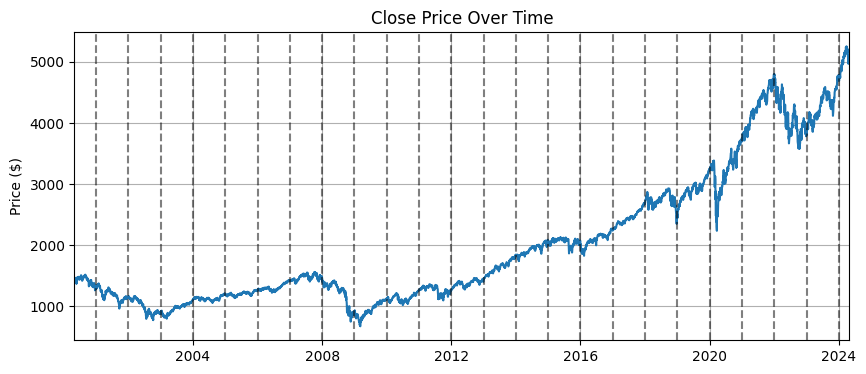

In [9]:
# Plotting Stock Price over Time

plt.figure(figsize=(10,4))
plt.plot(stock_df_clean["Close"])
plt.title("Close Price Over Time")
plt.ylabel("Price ($)")
plt.grid()
for year in range(2000, 2026):
    plt.axvline(pd.to_datetime(str(year)+"-01-01"), color="black", linestyle="--", alpha=0.5)
plt.xlim(pd.to_datetime('2000-05-01'), pd.to_datetime('2024-04-30'))
plt.show()

### ACF

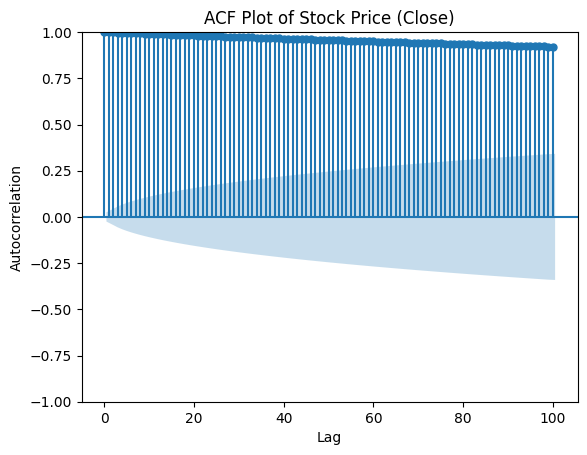

In [10]:
# acf plot 
acf_plot = plot_acf(stock_df_clean["Close"], lags=100)
plt.title("ACF Plot of Stock Price (Close)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

Does not look like a purely autoregressive process???? Look more into this

ACF does decay slowly which tells us that the data is not stationary. This is true since the plot on our data above shows the stock price increasing over time.

### PACF

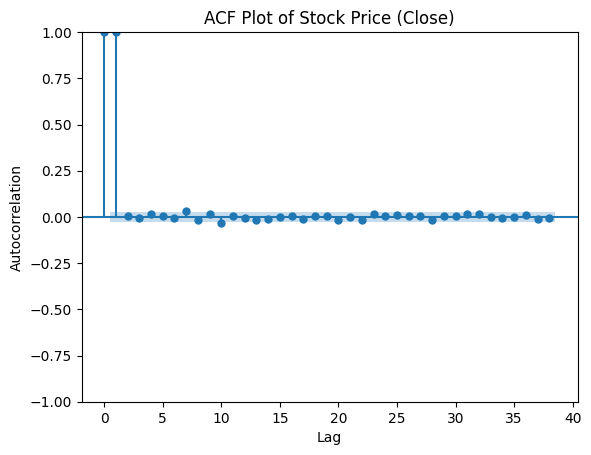

In [11]:
# PACF plot
pacf_plot = plot_pacf(stock_df_clean["Close"])
plt.title("ACF Plot of Stock Price (Close)")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

So how do we make the stock data more stationary? Using First difference?? 

First Difference = Close<sub>(t)</sub> - Close<sub>(t-1)</sub>

In [12]:
# First differerence
stock_df_clean["Close"].values[1:]

array([1446.290039, 1415.099976, 1409.569946, ..., 5099.959961,
       5116.169922, 5035.689941])

In [13]:
stock_df_clean["Close"].values[:-1]

array([1468.25    , 1446.290039, 1415.099976, ..., 5048.419922,
       5099.959961, 5116.169922])

In [14]:
# First Difference
first_diffs = stock_df_clean["Close"].values[1:] - stock_df_clean["Close"].values[:-1]

In [15]:
first_diffs

array([-21.959961, -31.190063,  -5.53003 , ...,  51.540039,  16.209961,
       -80.479981])

In [16]:
diffs = pd.Series([first_diffs, [0]])

In [17]:
diffs

0    [-21.95996100000002, -31.19006300000001, -5.53...
1                                                  [0]
dtype: object

In [18]:
diffs_df = pd.concat([stock_df_clean["Close"], diffs])

In [19]:
diffs_df

2000-05-01 00:00:00                                              1468.25
2000-05-02 00:00:00                                          1446.290039
2000-05-03 00:00:00                                          1415.099976
2000-05-04 00:00:00                                          1409.569946
2000-05-05 00:00:00                                          1432.630005
                                             ...                        
2024-04-26 00:00:00                                          5099.959961
2024-04-29 00:00:00                                          5116.169922
2024-04-30 00:00:00                                          5035.689941
0                      [-21.95996100000002, -31.19006300000001, -5.53...
1                                                                    [0]
Length: 6040, dtype: object